# Univariate Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("heart1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
2,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
3,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
4,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1


In [3]:
df.shape

(622, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       622 non-null    int64  
 1   sex       622 non-null    int64  
 2   cp        622 non-null    int64  
 3   trestbps  622 non-null    int64  
 4   chol      622 non-null    int64  
 5   fbs       622 non-null    int64  
 6   restecg   622 non-null    int64  
 7   thalach   622 non-null    int64  
 8   exang     622 non-null    int64  
 9   oldpeak   622 non-null    float64
 10  slope     622 non-null    int64  
 11  ca        622 non-null    int64  
 12  thal      622 non-null    int64  
 13  target    622 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 68.1 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,53.405145,0.606109,1.160772,130.316720,244.895498,0.154341,0.546624,153.826367,0.239550,0.800000,1.511254,0.524116,2.209003,0.786174
std,9.355039,0.489004,1.019869,16.861881,52.720974,0.361566,0.517251,21.760786,0.427152,1.011162,0.610458,0.912552,0.557238,0.410336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.250000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,236.000000,0.000000,1.000000,158.000000,0.000000,0.400000,2.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,170.000000,0.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
from sklearn.feature_selection import SelectKBest

In [8]:
from sklearn.feature_selection import chi2

In [9]:
X = df.drop("target", axis=1)
y = df['target']

In [10]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)

In [11]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [12]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['attri','score']

In [13]:
featureScores

,attri,score
0,age,27.114676
1,sex,15.545019
2,cp,73.395137
3,trestbps,19.834882
4,chol,23.631712
5,fbs,0.134388
6,restecg,3.284306
7,thalach,233.006465
8,exang,74.300493
9,oldpeak,145.178761


In [14]:
print(featureScores.nlargest(10,'score'))

       attri       score
7    thalach  233.006465
9    oldpeak  145.178761
11        ca  135.878212
8      exang   74.300493
2         cp   73.395137
0        age   27.114676
4       chol   23.631712
3   trestbps   19.834882
1        sex   15.545019
10     slope   13.977474


In [15]:
cp=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
thal=pd.get_dummies(df['ca'],prefix='ca',drop_first=True)
slope=pd.get_dummies(df['slope'],prefix='slope',drop_first=True)

In [16]:
new_df=pd.concat([df,cp,thal,slope],axis=1)
new_df=new_df.drop(['cp','ca','slope'],axis=1)
new_df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,thal,target,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2
0,77,1,125,304,0,0,162,1,0.0,2,0,0,0,0,0,0,1,0,0,1
1,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
2,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
3,76,0,140,197,0,2,116,0,1.1,2,1,0,1,0,0,0,0,0,1,0
4,74,0,120,269,0,0,121,1,0.2,2,1,1,0,0,1,0,0,0,0,1


In [17]:
X = new_df.drop(["target","fbs","restecg","thal"],axis=1)
y = new_df['target']

In [18]:
X

,age,sex,trestbps,chol,thalach,exang,oldpeak,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4,slope_1,slope_2
0,77,1,125,304,162,1,0.0,0,0,0,0,0,1,0,0,1
1,76,0,140,197,116,0,1.1,0,1,0,0,0,0,0,1,0
2,76,0,140,197,116,0,1.1,0,1,0,0,0,0,0,1,0
3,76,0,140,197,116,0,1.1,0,1,0,0,0,0,0,1,0
4,74,0,120,269,121,1,0.2,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,34,1,118,182,174,0,0.0,0,0,1,0,0,0,0,0,1
618,34,0,118,210,192,0,0.7,1,0,0,0,0,0,0,0,1
619,34,1,118,182,174,0,0.0,0,0,1,0,0,0,0,0,1
620,34,0,118,210,192,0,0.7,1,0,0,0,0,0,0,0,1


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='sex', ylabel='count'>

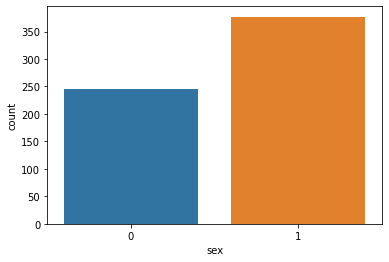

In [21]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='exang', ylabel='count'>

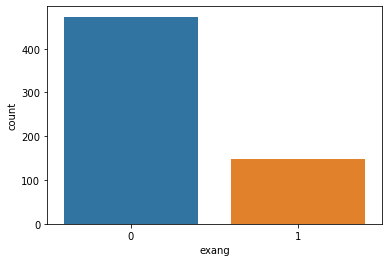

In [22]:
sns.countplot(x='exang',data=df)